In [1]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

In [2]:
import matplotlib.pyplot as plt
import scanpy as sc

plt.rcParams['text.color'] = 'black'
sc.set_figure_params(dpi=300, facecolor='white')

In [17]:
# Define your data as a dictionary
data = {
    'Method': ['ComGRN', 'DeepSEM', 'RegDiffusion', 'PIDC', 'GRNBOOST2'],
    'Non_Spec_EPR': [4.05, 2.89, 3.52, 3.43, 2.29],
    'Non_Spec_AUPR_ratio': [1.88, 1.39, 1.56, 1.72, 1.36],
    'Non_Spec_AUROC': [0.57, 0.54, 0.54, 0.58, 0.55],
    'Spec_EPR': [1.11, 1.08, 0.87, 1.13, 1.09],
    'Spec_AUPR_ratio': [1.14, 1.16, 1.04, 1.13, 1.12],
    'Spec_AUROC': [0.54, 0.54, 0.50, 0.56, 0.54],
    'STR_EPR': [5.12, 4.70, 4.98, 4.73, 2.93],
    'STR_AUPR_ratio': [2.89, 2.11, 2.32, 2.69, 1.67],
    'STR_AUROC': [0.63, 0.57, 0.60, 0.63, 0.58],
    'lofgof_EPR': [1.69, 1.00, 1.11, 1.21, 1.39],
    'lofgof_AUPR_ratio': [1.40, 1.12, 1.12, 1.24, 1.34],
    'lofgof_AUROC': [0.57, 0.54, 0.51, 0.54, 0.56],
    'Avg_Rank': [1.4, 3.8, 3.8, 2.3, 3.7]
}

data = {
    'Method': ['ComGRN', 'DeepSEM', 'RegDiffusion', 'PIDC', 'GRNBOOST2'],
    'Non_Spec_EPR': [3.32, 2.88, 3.22, 2.88, 2.57],
    'Non_Spec_AUPR_ratio': [1.88, 1.60, 1.76, 1.87, 1.57],
    'Non_Spec_AUROC': [0.58, 0.56, 0.57, 0.61, 0.58],
    'Spec_EPR': [1.21, 1.10, 1.00, 1.24, 1.14],
    'Spec_AUPR_ratio': [1.25, 1.14, 1.08, 1.25, 1.19],
    'Spec_AUROC': [0.58, 0.53, 0.50, 0.61, 0.56],
    'STR_EPR': [5.03, 5.41, 5.35, 5.08, 3.97],
    'STR_AUPR_ratio': [3.43, 3.28, 3.30, 3.29, 2.55],
    'STR_AUROC': [0.68, 0.66, 0.66, 0.67, 0.63],
    'lofgof_EPR': [1.53, 0.70, 1.17, 1.39, 1.56],
    'lofgof_AUPR_ratio': [1.46, 0.93, 1.19, 1.41, 1.50],
    'lofgof_AUROC': [0.60, 0.47, 0.51, 0.60, 0.61],
    'Avg_Rank': [1.9, 4.00, 3.7, 2.1, 3.3]
}

# Create a DataFrame
df = pd.DataFrame(data)

In [18]:
df

,Method,Non_Spec_EPR,Non_Spec_AUPR_ratio,Non_Spec_AUROC,Spec_EPR,Spec_AUPR_ratio,Spec_AUROC,STR_EPR,STR_AUPR_ratio,STR_AUROC,lofgof_EPR,lofgof_AUPR_ratio,lofgof_AUROC,Avg_Rank
0,ComGRN,3.32,1.88,0.58,1.21,1.25,0.58,5.03,3.43,0.68,1.53,1.46,0.60,1.9
1,DeepSEM,2.88,1.60,0.56,1.10,1.14,0.53,5.41,3.28,0.66,0.70,0.93,0.47,4.0
2,RegDiffusion,3.22,1.76,0.57,1.00,1.08,0.50,5.35,3.30,0.66,1.17,1.19,0.51,3.7
3,PIDC,2.88,1.87,0.61,1.24,1.25,0.61,5.08,3.29,0.67,1.39,1.41,0.60,2.1
4,GRNBOOST2,2.57,1.57,0.58,1.14,1.19,0.56,3.97,2.55,0.63,1.56,1.50,0.61,3.3


In [19]:
cols = df.columns[1:]


colnames = [
    "EPR",
    "AUPRC Ratio",
    "AUROC",
    "EPR",
    "AUPRC Ratio",
    "AUROC",
    "EPR",
    "AUPRC Ratio",
    "AUROC",
    "EPR",
    "AUPRC Ratio",
    "AUROC",
    "Avg. Rank",
]

col_to_name = dict(zip(cols, colnames))

In [20]:
df = df.set_index("Method")
df

,Non_Spec_EPR,Non_Spec_AUPR_ratio,Non_Spec_AUROC,Spec_EPR,Spec_AUPR_ratio,Spec_AUROC,STR_EPR,STR_AUPR_ratio,STR_AUROC,lofgof_EPR,lofgof_AUPR_ratio,lofgof_AUROC,Avg_Rank
Method,,,,,,,,,,,,,
ComGRN,3.32,1.88,0.58,1.21,1.25,0.58,5.03,3.43,0.68,1.53,1.46,0.60,1.9
DeepSEM,2.88,1.60,0.56,1.10,1.14,0.53,5.41,3.28,0.66,0.70,0.93,0.47,4.0
RegDiffusion,3.22,1.76,0.57,1.00,1.08,0.50,5.35,3.30,0.66,1.17,1.19,0.51,3.7
PIDC,2.88,1.87,0.61,1.24,1.25,0.61,5.08,3.29,0.67,1.39,1.41,0.60,2.1
GRNBOOST2,2.57,1.57,0.58,1.14,1.19,0.56,3.97,2.55,0.63,1.56,1.50,0.61,3.3


In [21]:
Non_spec_cols = df.columns[0:3].to_list()
spec_cols = df.columns[3:6].to_list()
STR_cols = df.columns[6:9].to_list()
lofgof_cols = df.columns[9:12].to_list()

In [22]:
col_defs = (
    [
        ColumnDefinition(
            name="Team",
            textprops={"ha": "left", "weight": "bold"},
            width=1.5,
        ),
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col_to_name[col],
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df[col], cmap=matplotlib.cm.PRGn_r), # PiYG
            group="Non Spec",
        )
        for col in Non_spec_cols
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col_to_name[col],
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df[col], cmap=matplotlib.cm.PRGn_r),
            group="Spec",
        )
        for col in spec_cols
    ]    
    + [
        ColumnDefinition(
            name=col,
            title=col_to_name[col],
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df[col], cmap=matplotlib.cm.PRGn_r),
            group="STR",
        )
        for col in STR_cols
    ]
    + [
        ColumnDefinition(
            name=col,
            title=col_to_name[col],
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            cmap=normed_cmap(df[col], cmap=matplotlib.cm.PRGn_r),
            group="lofgof",
        )
        for col in lofgof_cols
    ]
    + [
        ColumnDefinition(
            name="Avg_Rank",
            title="Avg. Rank",
            width=0.75,
            textprops={"ha": "center"},
        )
    ])

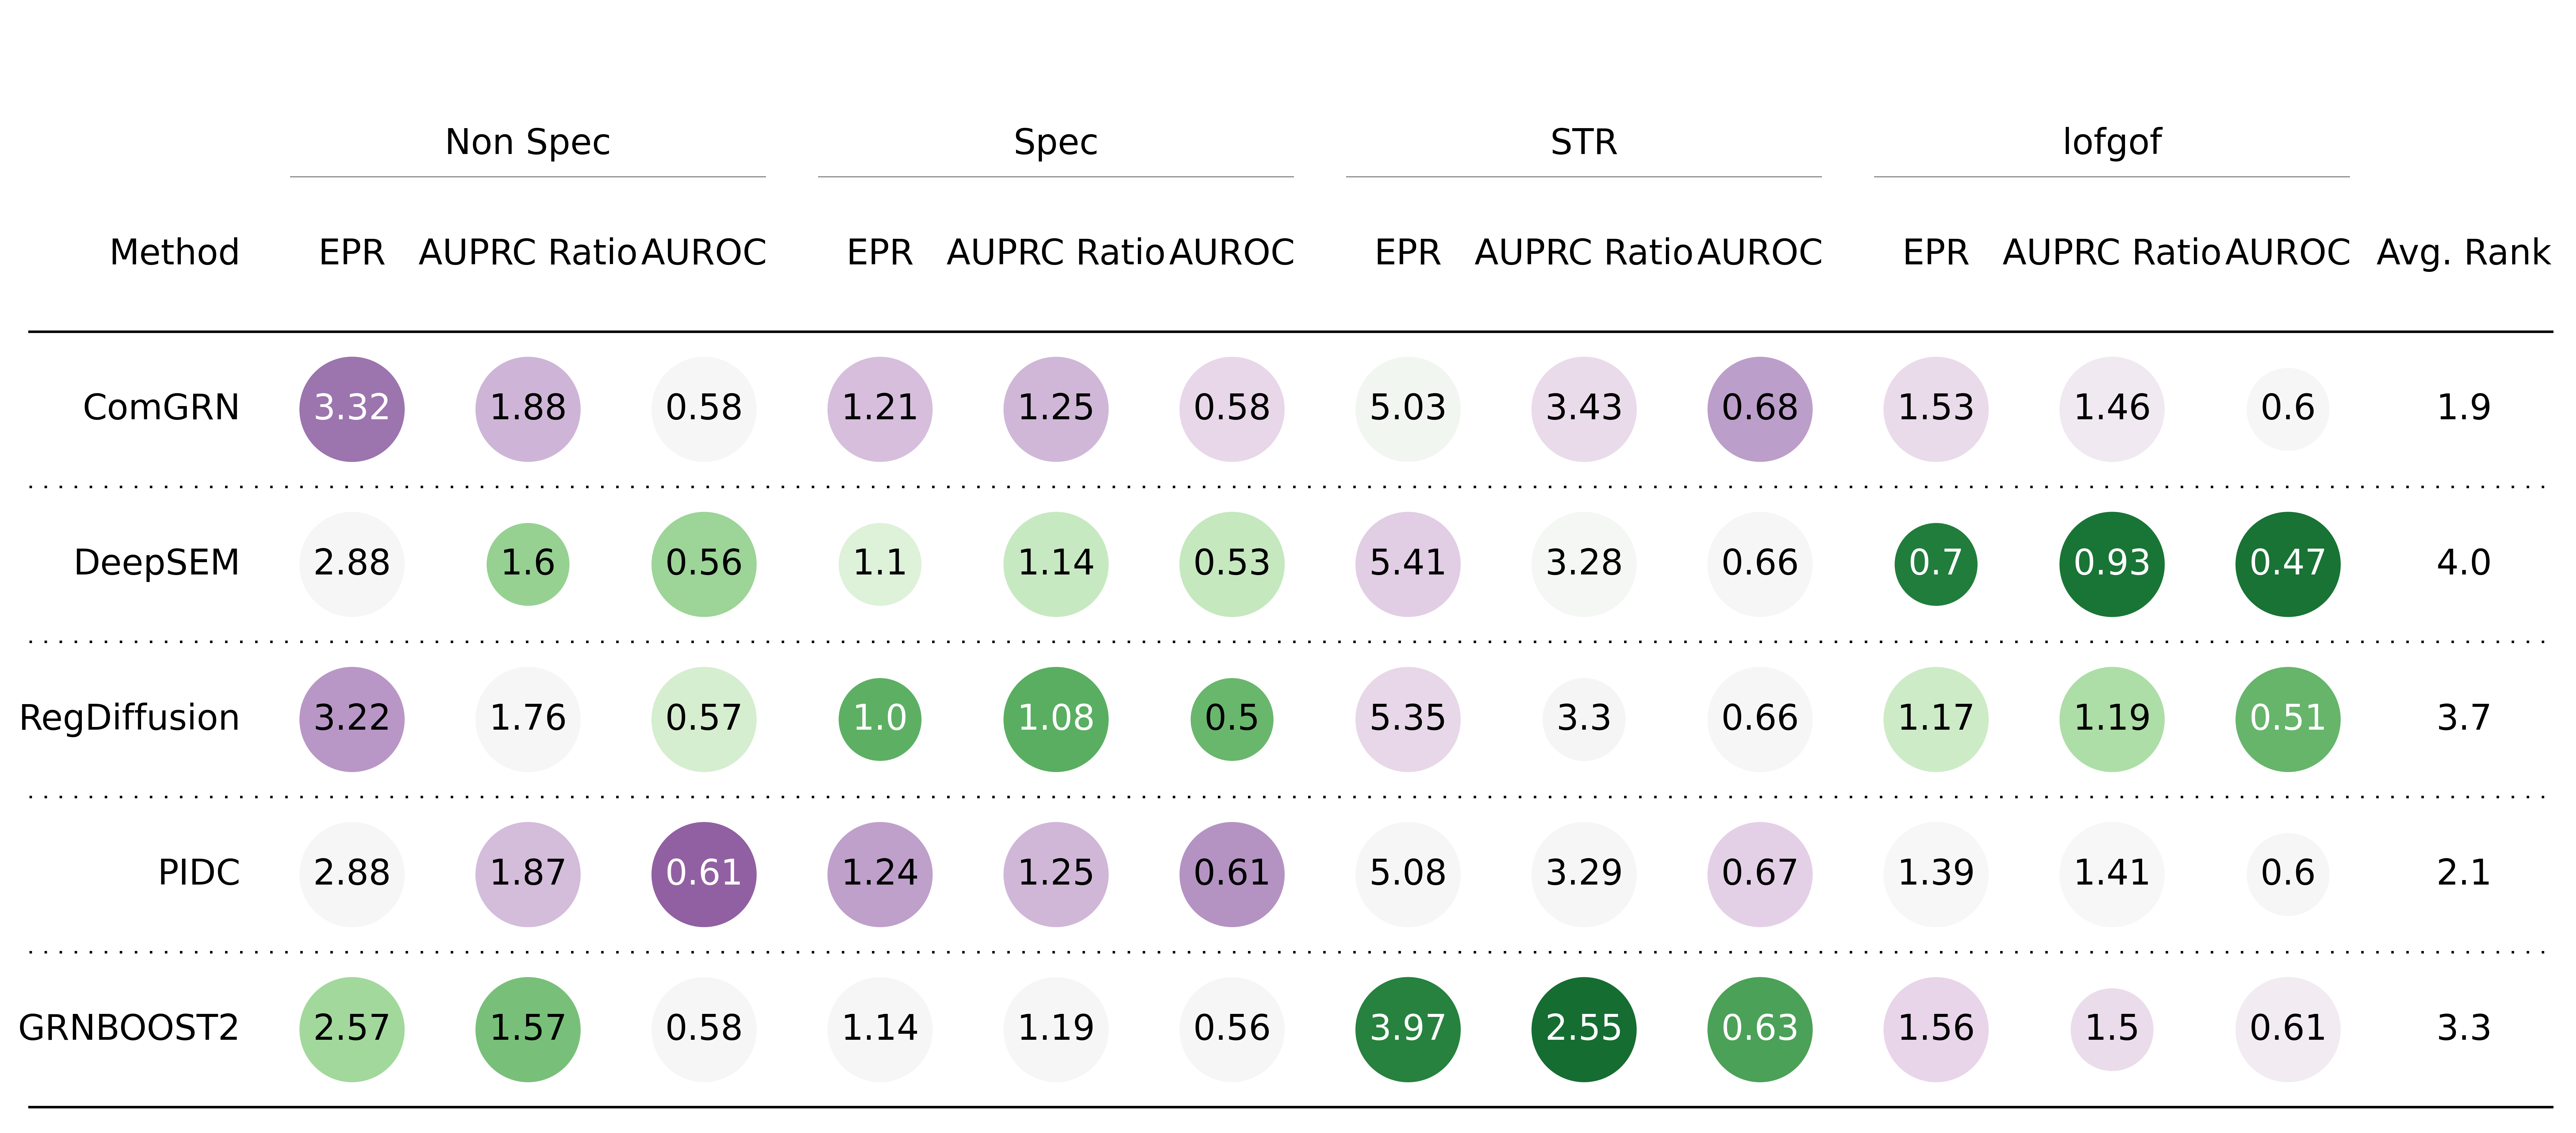

In [23]:
fig, ax = plt.subplots(figsize=(18, 8))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
).autoset_fontcolors()

# fig.savefig("images/wwc_table.png", facecolor=ax.get_facecolor(), dpi=200)